In this example, we will show you how to predict propensity of prospects. This code example goes with the lesson with the same title. We will use web clicks data about the links clicked by the user while he is browsing to predict his propensity to buy the product. Using that propensity, we will decide whether we want to offer chat to the customer with an agent

 #  <p style="text-align: center;">Potential To Purchases</p> 

## Loading and Viewing Data
We will load the data file for this example and checkout summary statistics and columns for that file.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
import sklearn.metrics

#prospect_data = pd.read_csv("Propensity_Matrix_revised.csv")

prospect_data = pd.read_csv("Propensity_Matrix_revised.csv")

prospect_data.dtypes

Session Id               int64
Landing                  int64
Login                    int64
Product_Cat              int64
Filter                   int64
Product_Selection        int64
Product_Features         int64
Reviews                  int64
QnA                      int64
Product_info             int64
Product_Wishlist_Keep    int64
Product_Wishlist_Del     int64
New_account              int64
Check_Cart               int64
Del_cart                 int64
Pay_Ship_info            int64
Cancel_order             int64
Rating                   int64
Ask_Ques                 int64
Ans_Ques                 int64
Supplier_review          int64
Membership               int64
Logout                   int64
Purchase_conf            int64
dtype: object

# The data contains information about the various links on the website that are clicked by the user during his browsing. This is past data that will be used to build the model.

- Session ID : A unique identifier for each web browsing session
- Purchase_conf : Whether the prospect ended up buying the product
- Other columns : a 0 or 1(occurance of event) indicator to show whether the prospect visited that particular page or did the activity mentioned.


In [11]:
# Look at the top records to understand how the data looks like.
prospect_data.head().transpose()

,0,1,2,3,4
Session Id,1,2,3,4,5
Landing,0,0,0,0,0
Login,1,0,0,1,1
Product_Cat,1,1,0,0,1
Filter,0,1,0,1,0
Product_Selection,0,0,0,1,1
Product_Features,1,1,1,0,1
Reviews,0,1,0,0,0
QnA,0,0,0,1,1
Product_info,0,0,0,0,0


In [12]:
#Do summary statistics analysis of the data
prospect_data.describe()

,Session Id,Landing,Login,Product_Cat,Filter,Product_Selection,Product_Features,Reviews,QnA,Product_info,...,Del_cart,Pay_Ship_info,Cancel_order,Rating,Ask_Ques,Ans_Ques,Supplier_review,Membership,Logout,Purchase_conf
count,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,0.498000,0.502000,0.496000,0.5200,0.514000,0.488000,0.494000,0.512000,0.506000,...,0.524000,0.546000,0.490000,0.510000,0.472000,0.438000,0.542000,0.514000,0.506000,0.368000
std,144.481833,0.500497,0.500497,0.500485,0.5001,0.500305,0.500357,0.500465,0.500357,0.500465,...,0.499924,0.498378,0.500401,0.500401,0.499715,0.496638,0.498732,0.500305,0.500465,0.482744
min,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.750000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,0.000000,1.000000,0.000000,1.0000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,375.250000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,500.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:

prospect_data[prospect_data.isnull().any(axis=1)]

,Session Id,Landing,Login,Product_Cat,Filter,Product_Selection,Product_Features,Reviews,QnA,Product_info,...,Del_cart,Pay_Ship_info,Cancel_order,Rating,Ask_Ques,Ans_Ques,Supplier_review,Membership,Logout,Purchase_conf


### Perform Correlation Analysis

In [14]:
#perform corelation using pandas corr()
prospect_data.corr()['Purchase_conf']


Session Id              -0.019509
Landing                  0.011347
Login                   -0.027935
Product_Cat              0.006105
Filter                   0.027559
Product_Selection       -0.029672
Product_Features         0.001726
Reviews                 -0.057201
QnA                     -0.059802
Product_info             0.007432
Product_Wishlist_Keep   -0.058515
Product_Wishlist_Del    -0.013536
New_account              0.055890
Check_Cart               0.020971
Del_cart                -0.028366
Pay_Ship_info            0.695820
Cancel_order             0.031856
Rating                   0.042807
Ask_Ques                 0.076028
Ans_Ques                -0.013307
Supplier_review          0.052206
Membership              -0.013077
Logout                   0.007432
Purchase_conf            1.000000
Name: Purchase_conf, dtype: float64

# Pair Plot Analysis

# We are unable to arrive at the corelation among variable

In [15]:
%matplotlib inline

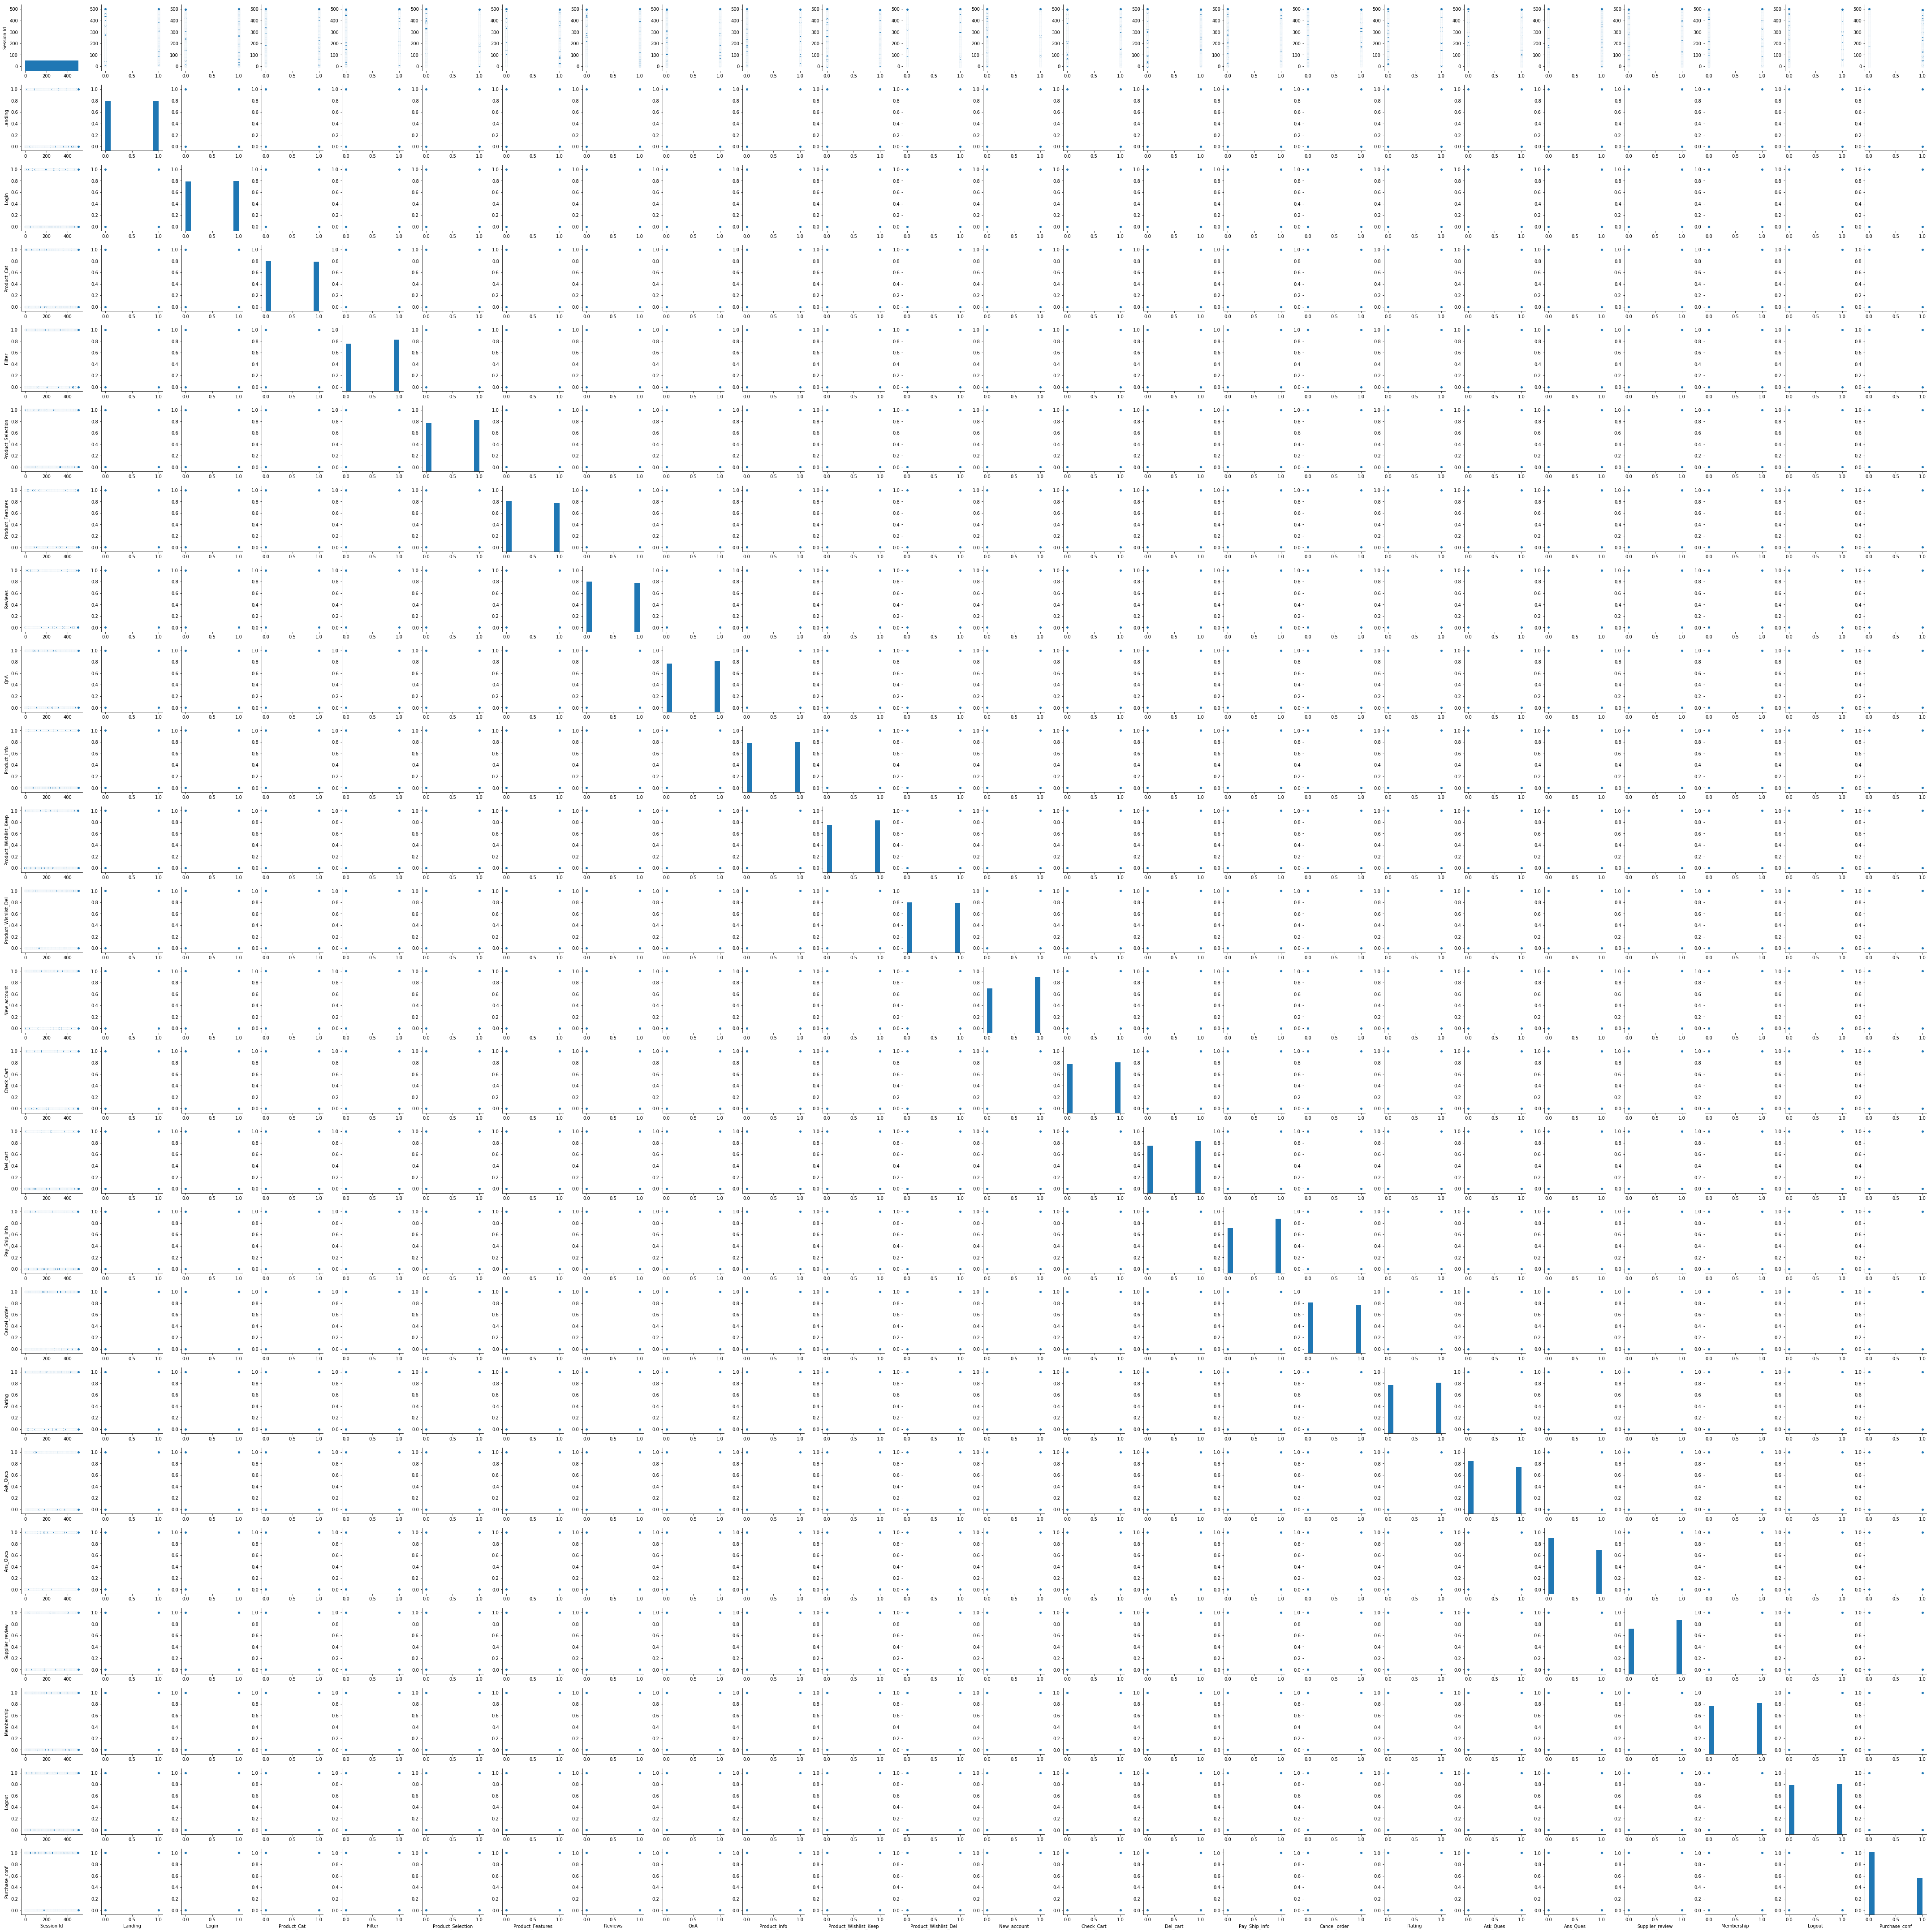

In [16]:
import seaborn as sns
sns.pairplot(prospect_data)

In [17]:
#Drop columns with low correlation
#predictors = prospect_data[['Registered','Browsed_Reviews','Compared_prod','Accessed_Warranty','Visited_Sponsored_links']]
#targets = prospect_data.Purchased

predictors = prospect_data[['Product_Features','Reviews','QnA','Product_info','Product_Wishlist_Keep','Rating','Ask_Ques', 'Supplier_review','Pay_Ship_info']]

targets = prospect_data.Purchase_conf


##  Split the data to training and test set in the ratio of 70:30 respectively



In [18]:
train_X, test_X, train_y, test_y  =   train_test_split(predictors, targets, test_size=.3)

print( "Training set predictors : ", train_X.shape, "Test set predictors : ", test_X.shape )


Training set predictors :  (350, 9) Test set predictors :  (150, 9)


# Build Model and Check Accuracy Naive bayser

In [19]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier=classifier.fit(train_X,train_y)    #Create NB model on training set

predictions=classifier.predict(test_X)

#Assess the accuracy of the model on test data
sklearn.metrics.confusion_matrix(test_y,predictions)


array([[62, 29],
       [ 0, 59]])

In [20]:
sklearn.metrics.accuracy_score(test_y, predictions) 

0.80666666666666664

# Multinomial NB

In [21]:
from sklearn.naive_bayes import MultinomialNB

classifier=MultinomialNB()
classifier=classifier.fit(train_X,train_y)    #Creaate NB model on training set

predictions=classifier.predict(test_X)

#Assess the accuracy of the model on test data
sklearn.metrics.confusion_matrix(test_y,predictions)


array([[79, 12],
       [33, 26]])

In [22]:
sklearn.metrics.accuracy_score(test_y, predictions) 

0.69999999999999996

In [23]:
from sklearn.naive_bayes import BernoulliNB

classifier=BernoulliNB()
classifier=classifier.fit(train_X,train_y)    #Creaate NB model on training set

predictions=classifier.predict(test_X)

#Assess the accuracy of the model on test data
sklearn.metrics.confusion_matrix(test_y,predictions)

array([[62, 29],
       [ 0, 59]])

In [24]:
sklearn.metrics.accuracy_score(test_y, predictions)

0.80666666666666664

# Model accuracy of 75 is good enough to continue building this model. 

In [25]:
pred_prob=classifier.predict_proba(test_X)  #capture the probability values for each test case being in 
# class 0 (no purchase)or class 1 (purchased)
pred_prob

array([[ 0.99368999,  0.00631001],
       [ 0.99649942,  0.00350058],
       [ 0.30512638,  0.69487362],
       [ 0.38673104,  0.61326896],
       [ 0.27113433,  0.72886567],
       [ 0.35405244,  0.64594756],
       [ 0.31565145,  0.68434855],
       [ 0.2776058 ,  0.7223942 ],
       [ 0.99405528,  0.00594472],
       [ 0.33817905,  0.66182095],
       [ 0.30447633,  0.69552367],
       [ 0.26093433,  0.73906567],
       [ 0.99368999,  0.00631001],
       [ 0.99312205,  0.00687795],
       [ 0.99478114,  0.00521886],
       [ 0.99335422,  0.00664578],
       [ 0.35397123,  0.64602877],
       [ 0.99643974,  0.00356026],
       [ 0.40454037,  0.59545963],
       [ 0.30207904,  0.69792096],
       [ 0.30305768,  0.69694232],
       [ 0.99498112,  0.00501888],
       [ 0.99208344,  0.00791656],
       [ 0.99490767,  0.00509233],
       [ 0.26918193,  0.73081807],
       [ 0.99579957,  0.00420043],
       [ 0.99704231,  0.00295769],
       [ 0.2670555 ,  0.7329445 ],
       [ 0.30358353,

In [26]:
#Predicting the probability of purchase for a customer who is browsing the website and accessing different 
#links, information 

#Since we considered only 4 parameters as good predictors of purchase / no purchase... the moment he 
#engages with any of those predictors, the model recalculates the propensity to purchase 

In [28]:
# Assume a new user browsed your website but did not take any action. Let us estimate his propensity to purchase
# 'Product_Cat','Filter','Product_Features','Reviews','Check_Cart', 'Pay_Ship_info', 'Rating', 'Supplier_review'
#'Product_Features','Reviews','QnA','Product_info','Product_Wishlist_Keep','Rating', 'Supplier_review'

browsing_data = np.array([0,0,0,0,0,0,0,0,0]).reshape(1, -1)
print(" Initial purchase propensity :",classifier.predict_proba(browsing_data)[:,1] )


 Initial purchase propensity : [ 0.00641728]


   #Visitor has landed on the page and this is the apriori probability of the visitor buying something

In [29]:
#Suppose customer browses reviews for your product available  at your site 


browsing_data = np.array([0,0,0,0,0,0,0,0,1]).reshape(1, -1)
print("On browsing other customer reviews: purchase propensity :",classifier.predict_proba(browsing_data)[:,1] )


On browsing other customer reviews: purchase propensity : [ 0.68891939]


The propensity changes. With each event such as studying customer review the propensity should change if the event is a precursor to purchase

In [30]:
#Suppose customer browses reviews and compares products at your site and also compare your product with other similar products that you have a provision for 
#at your website. 

browsing_data = np.array([1,1,1,1,1,1,0,1,0]).reshape(1, -1)
print("On comparing products: purchase propensity :",classifier.predict_proba(browsing_data)[:,1] )


On comparing products: purchase propensity : [ 0.00453765]


Note: The events do not have to happen in the sequence. They can happen in any order. A visitor may study product features and go to studying terms and conditions while other visitor goes to the reviews. The moment it crosses a threshold, send him a invitation message....

In [31]:
#Suppose customer browses reviews for your product available  at your site and also compare your product with other similar products that you have a provision for 
#at your website and registers


browsing_data = np.array([1,1,1,1,1,1,1,1,1]).reshape(1, -1)
print("On registering at your website: purchase propensity :",classifier.predict_proba(browsing_data)[:,1] )

On registering at your website: purchase propensity : [ 0.65075756]


In [32]:
### when the visitor registers at your website, the purchase potential increases to 50%
# When the purchase potential goes beyond a threhold, you can consider connecting to him to help him decide. 

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression


Logit_classifier = LogisticRegression()
Logit_classifier=Logit_classifier.fit(train_X,train_y)

Logit_predictions=Logit_classifier.predict(test_X)

#Assess the accuracy of the model on test data
sklearn.metrics.confusion_matrix(test_y,Logit_predictions)


array([[62, 29],
       [ 1, 58]])

In [34]:
sklearn.metrics.accuracy_score(test_y, Logit_predictions) 

0.80000000000000004

# Build Model and Check Accuracy ( Decision Tree)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
                                  
dt_classifier = DecisionTreeClassifier(criterion = 'entropy' )
dt_classifier=dt_classifier.fit(train_X,train_y)
dt_predictions=dt_classifier.predict(test_X)

#Assess the accuracy of the model on test data
sklearn.metrics.confusion_matrix(test_y,dt_predictions)



array([[74, 17],
       [16, 43]])

In [37]:
sklearn.metrics.accuracy_score(test_y, dt_predictions) 

0.78000000000000003